# Classification: Beat the market ;-)

For classification, again we will use an example from ISLR (http://www-bcf.usc.edu/~gareth/ISL/).
We will try to predict, based on the index values for the preceding 5 days, if the S&P is going to go up or down the next day.

This example is very different from the usual classification demos, in that the classes are not just not linearly separable, but possible not separable "at all" - we don't really expect this to work, do we?

So, let's try ;-) This time, we first need to load the data from csv.

## Load and inspect the data

In [1]:
# the usual imports
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
smarket = pd.read_csv('../data/Smarket.csv').iloc[:,1:]

In [3]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


As we see, the data is conveniently preprocessed, no need to calculate the lags ourselves.

In [4]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


The target for our predictions is "Direction". We need to convert this to numerical (binary).

In [6]:

smarket['dir_0_1'] = np.where(smarket['Direction'] == 'Up', 1, 0)
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,dir_0_1
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up,1
5,2001,0.213,0.614,-0.623,1.032,0.959,1.34910,1.392,Up,1
6,2001,1.392,0.213,0.614,-0.623,1.032,1.44500,-0.403,Down,0
7,2001,-0.403,1.392,0.213,0.614,-0.623,1.40780,0.027,Up,1
8,2001,0.027,-0.403,1.392,0.213,0.614,1.16400,1.303,Up,1
9,2001,1.303,0.027,-0.403,1.392,0.213,1.23260,0.287,Up,1


## Split into training and test sets

In [7]:
x_columns = ['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']
X_train = smarket[smarket['Year'] != 2005][x_columns].values
y_train = smarket[smarket['Year'] != 2005][['dir_0_1']].values[:,0]
X_test = smarket[smarket['Year'] == 2005][x_columns].values
y_test = smarket[smarket['Year'] == 2005][['dir_0_1']].values[:,0]

## Standardize

We standardize the variables because even though the deltas (Lag<n>) are on the same scale, Volume isn't.

In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.mean_, scaler.scale_

(array([ -3.55983335e-18,  -1.06795000e-17,  -3.55983335e-18,
          3.55983335e-17,   3.91581668e-17,   7.68924003e-16]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]))

## Logistic Regression

In [14]:
from sklearn import metrics
from sklearn import linear_model
def assess_classification_performance(model, X_train, y_train, X_test, y_test, short = False):
  
    accuracy_train = metrics.accuracy_score(y_train, model.predict(X_train))
    accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))
    print('Accuracy (train/test): {} / {}\n'.format(accuracy_train, accuracy_test))
    
    if not short:
    
      # confusion matrix: rows = actual group, columns = predicted group
      print('Confusion_matrix (training data):\n {}'.format(metrics.confusion_matrix(y_train, model.predict(X_train))))
      print('\nConfusion_matrix (test data):\n {}'.format(metrics.confusion_matrix(y_test, model.predict(X_test))))

      # precision =  tp / (tp + fp)
      # recall = tp / (tp + fn) (= sensitivity)
      # F1 = 2 * (precision * recall) / (precision + recall)
      print('\nPrecision - recall (training data):')
      print(metrics.classification_report(y_train, model.predict(X_train)))
      
      print('\nPrecision - recall (test data):')
      print(metrics.classification_report(y_test, model.predict(X_test)))

In [15]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(X_train, y_train)
print('Coefficients ({}):\n{}\n'.format(x_columns, logistic_model.coef_)) 

Coefficients (['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']):
[[-0.06632063 -0.05605806  0.00885093  0.0079177  -0.00521892 -0.03097094]]



In [16]:
assess_classification_performance(logistic_model, X_train, y_train, X_test, y_test)  

Accuracy (train/test): 0.527054108216 / 0.480158730159

Confusion_matrix (training data):
 [[175 316]
 [156 351]]

Confusion_matrix (test data):
 [[77 34]
 [97 44]]

Precision - recall (training data):
             precision    recall  f1-score   support

          0       0.53      0.36      0.43       491
          1       0.53      0.69      0.60       507

avg / total       0.53      0.53      0.51       998


Precision - recall (test data):
             precision    recall  f1-score   support

          0       0.44      0.69      0.54       111
          1       0.56      0.31      0.40       141

avg / total       0.51      0.48      0.46       252



Unfortunately...

In [17]:
majority_vote_classifier_accuracy = max(y_test.mean(), 1 - y_test.mean())
majority_vote_classifier_accuracy

0.55952380952380953

## Logistic Regression using statsmodels

In [18]:
import statsmodels.api as sm
sm_logistic = sm.GLM(y_train, X_train, sm.families.Binomial())
sm_results = sm_logistic.fit()
print sm_results.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  998
Model:                            GLM   Df Residuals:                      992
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -690.68
Date:                Tue, 19 Jul 2016   Deviance:                       1381.4
Time:                        14:15:22   Pearson chi2:                     998.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0666      0.064     -1.046      0.295        -0.191     0.058
x2            -0.0563      0.064     -0.884      0.3

## Logistic Regression, lag1 & lag2 predictors only

In [20]:
X_train_lag12 = X_train[:,0:2]
X_test_lag12 = X_test[:,0:2]
logistic_model_lag12 = linear_model.LogisticRegression()
logistic_model_lag12.fit(X_train_lag12, y_train)
print('Coefficients ({}): {}\n'.format('Lag1, Lag2', logistic_model_lag12.coef_))

assess_classification_performance(logistic_model_lag12, X_train_lag12, y_train, X_test_lag12, y_test, short = True)

Coefficients (Lag1, Lag2): [[-0.06808079 -0.0544505 ]]

Accuracy (train/test): 0.516032064128 / 0.559523809524



In [21]:
# from https://github.com/rasbt/python-machine-learning-book
from matplotlib.colors import ListedColormap
def plot_decision_regions(title, X, y, classifier, test_idx=None, resolution=0.02):

    plt.figure()
    plt.title(title)
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('cyan', 'red', 'lightgreen', 'gray', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
      
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    plt.show()   

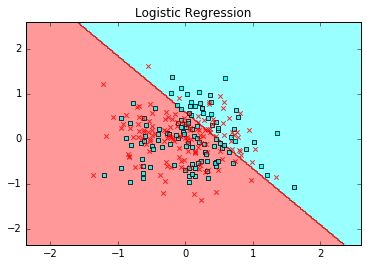

In [22]:
plot_decision_regions('Logistic Regression', X_test_lag12, y_test, logistic_model_lag12)

## Decision tree, lag1 & lag2 only

In [24]:
from sklearn import tree
tree_model_lag12 = tree.DecisionTreeClassifier()
tree_model_lag12.fit(X_train_lag12, y_train)
assess_classification_performance(tree_model_lag12,  X_train_lag12, y_train, X_test_lag12, y_test, short = True)

Accuracy (train/test): 1.0 / 0.52380952381



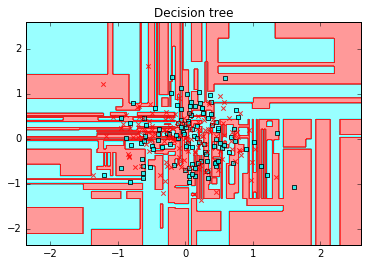

In [26]:
plot_decision_regions('Decision tree', X_test_lag12, y_test, tree_model_lag12)

In [27]:
tree_model_lag12.tree_.node_count

751

## Overfitting in action ;-)

Accuracy (train/test): 0.548096192385 / 0.547619047619



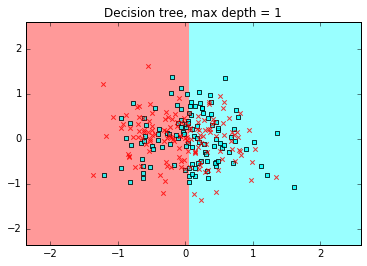

Accuracy (train/test): 0.552104208417 / 0.543650793651



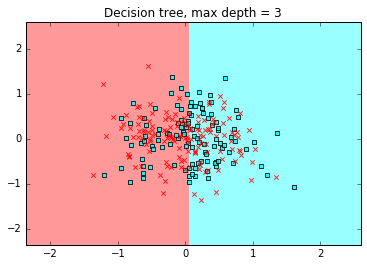

Accuracy (train/test): 0.593186372745 / 0.496031746032



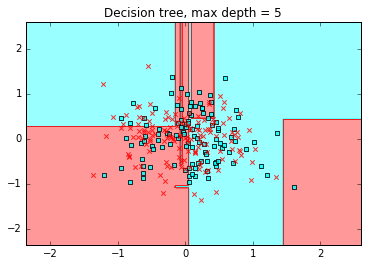

Accuracy (train/test): 0.645290581162 / 0.507936507937



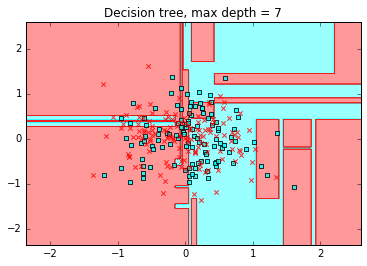

Accuracy (train/test): 0.716432865731 / 0.496031746032



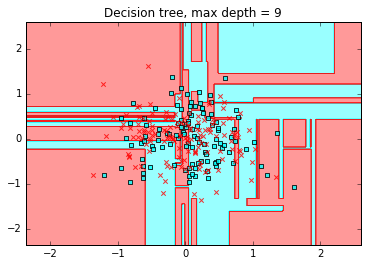

In [29]:
for i in range(1,10,2):
  tree_model_lag12 = tree.DecisionTreeClassifier(max_depth = i)
  tree_model_lag12.fit(X_train_lag12, y_train)
  tree.export_graphviz(tree_model_lag12, out_file = 'tree_' + str(i) + '.dot')
  assess_classification_performance(tree_model_lag12,  X_train_lag12, y_train, X_test_lag12, y_test, short = True)
  plot_decision_regions('Decision tree, max depth = ' + str(i), X_test_lag12, y_test, tree_model_lag12)

## Random Forest, lag1 & lag2 only

In [33]:
from sklearn import ensemble
forest_model_lag12 = ensemble.RandomForestClassifier(n_estimators = 10000)
forest_model_lag12.fit(X_train_lag12, y_train)

assess_classification_performance(forest_model_lag12,  X_train_lag12, y_train, X_test_lag12, y_test, short = True)

Accuracy (train/test): 1.0 / 0.503968253968



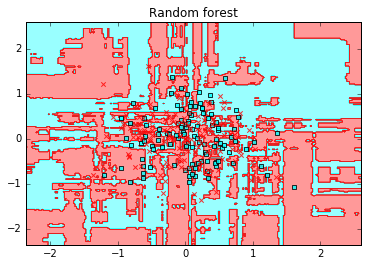

In [34]:
plot_decision_regions('Random forest', X_test_lag12, y_test, forest_model_lag12)

## Support Vector Machine, lag1 & lag2 only

In [36]:
from sklearn import svm
svc_model_lag12 = svm.SVC()
svc_model_lag12.fit(X_train_lag12, y_train)

assess_classification_performance(svc_model_lag12,  X_train_lag12, y_train, X_test_lag12, y_test, short = True)

Accuracy (train/test): 0.554108216433 / 0.579365079365



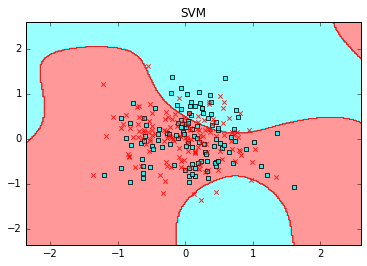

In [37]:
plot_decision_regions('SVM', X_test_lag12, y_test, svc_model_lag12)

## Linear Discriminant Analysis, using lag1 & lag2

In [38]:
from sklearn import discriminant_analysis
lda_model_lag12 = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 1, solver = 'eigen', store_covariance = True)
lda_model_lag12.fit(X_train_lag12, y_train)

print('Covariance matrix (shared by all classes): {}\n'.format(lda_model_lag12.covariance_))

Covariance matrix (shared by all classes): [[ 0.9988783  -0.02211225]
 [-0.02211225  0.99929622]]



In [39]:
lda_model_lag12.explained_variance_ratio_

array([  1.00000000e+00,   4.29615166e-15])

In [40]:
assess_classification_performance(lda_model_lag12, X_train_lag12, y_train, X_test_lag12, y_test, short=True)

Accuracy (train/test): 0.517034068136 / 0.559523809524



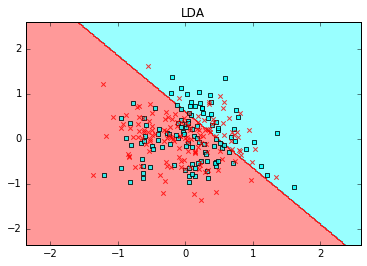

In [41]:
plot_decision_regions('LDA', X_test_lag12, y_test, lda_model_lag12)

## Quadratic Discriminant Analysis, using lag1 & lag2

In [42]:
qda_model_lag12 = discriminant_analysis.QuadraticDiscriminantAnalysis(store_covariances = True)
qda_model_lag12.fit(X_train_lag12, y_train)

print('Covariance matrices: {}\n'.format(qda_model_lag12.covariances_))

Covariance matrices: [array([[ 0.99739208, -0.0259821 ],
       [-0.0259821 ,  1.01654678]]), array([[ 1.00426567, -0.01845217],
       [-0.01845217,  0.98654093]])]



In [43]:
assess_classification_performance(qda_model_lag12, X_train_lag12, y_train, X_test_lag12, y_test, short = True)

Accuracy (train/test): 0.514028056112 / 0.599206349206



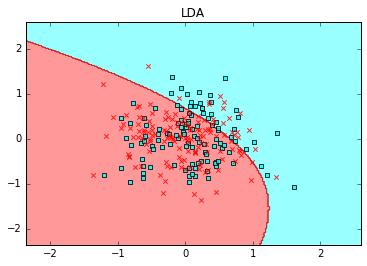

In [44]:

plot_decision_regions('LDA', X_test_lag12, y_test, qda_model_lag12)